# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
Analysis

 - The observation of correlation between body weight and average tumor volume among mice treated with Capomulin showed that tumor volume directly relates to the weight of a tumor-bearing mouse. 
 0.84 is a strong positive correlation for the depicted data.

 - From the selected treatments Capomulin (second best) and Ramicane (best) were the better treatments to reduce the size of tumor.

 - The gender of the mice did not affect the treatment results. The study used mice population of approximately 51% male mice and 49% female mice. The increase/decrease in tumor volume
 was demonstrated in both genders equally, but what did affect the study was the course of treatment (drug used). 

 - More study needs to be done to have a farther analysis of both treatments and to conclude effectiveness of Capomulin versus Ramicane.

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].nunique()
mice_number



249

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [95]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_ID)==False]
new_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [97]:
# Checking the number of mice in the clean DataFrame.
mice_clean_df = new_clean_df["Mouse ID"].nunique()
mice_clean_df

248

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).mean()
median = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).median()
var = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).var()
std = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).std()
sem = new_clean_df['Tumor Volume (mm3)'].groupby(new_clean_df['Drug Regimen']).sem()

stats_table = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":var, "Tumor Volume Std. Dev.":std, "Tumor Volume Std. Err.":sem})
stats_table



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_method_stats = new_clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_method_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

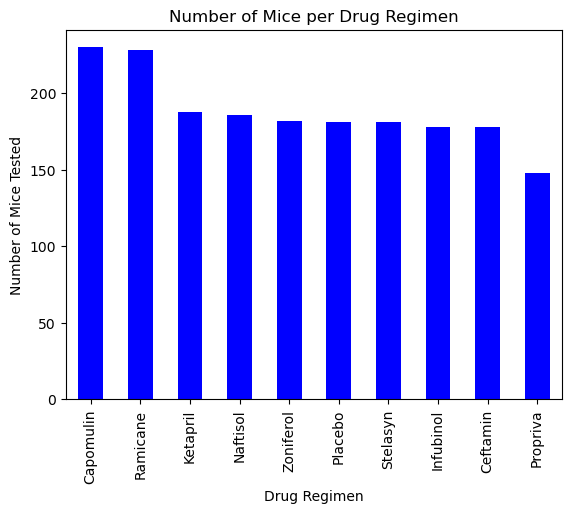

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# First we will establish how many mice were used per  Drug Regimen
mice_amount = new_clean_df["Drug Regimen"].value_counts()
mice_amount

#Plotting bar graph with the mice count
plot_pandas = mice_amount.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Drug Regimen")

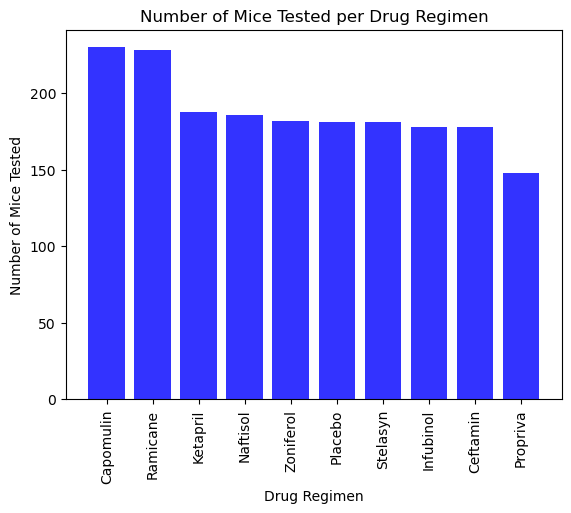

In [101]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = mice_amount.index.values
y = mice_amount.values

plt.bar(x, y, color='b', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.xticks(rotation="vertical")
plt.show()


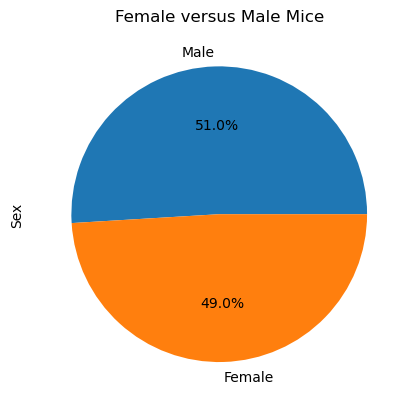

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = new_clean_df["Sex"].value_counts()
plt.title("Female versus Male Mice")
mice_gender.plot.pie(autopct= "%1.1f%%")
plt.show()


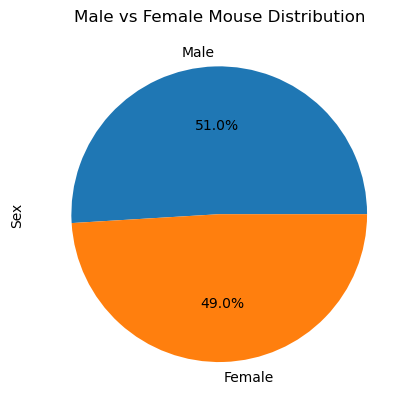

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = mice_gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Distribution')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = new_clean_df.loc[new_clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse (Capomulin)
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge_df = pd.merge(Capomulin_vol, new_clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [105]:
# Start by getting the last (greatest) timepoint for each mouse (Infubinol)
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge_df = pd.merge(Infubinol_vol, new_clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge_df.head()   

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [106]:
# Start by getting the last (greatest) timepoint for each mouse (Ramicane)
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge_df = pd.merge(Ramicane_vol, new_clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [107]:
# Start by getting the last (greatest) timepoint for each mouse (Capomulin)
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge_df = pd.merge(Ceftamin_vol, new_clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [108]:
#Creating a drug list
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [109]:

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset
# Determine outliers using upper and lower bounds

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"Lower quartile of {drug} treatments is: {lowerq}")
    print(f"Upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"{drug} outliers could be values below {lower_bound}.")
    print(f"{drug} outliers could be values above {upper_bound}.")
    print(f"------------------------------------------------------------")
    treatment+=1
    

------------------------------------------------------------
Lower quartile of Capomulin treatments is: 32.38
Upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Capomulin outliers could be values below 20.71.
Capomulin outliers could be values above 51.83.
------------------------------------------------------------
Lower quartile of Ramicane treatments is: 31.56
Upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Ramicane outliers could be values below 17.91.
Ramicane outliers could be values above 54.31.
------------------------------------------------------------
Lower quartile of Infubinol treatments is: 54.05
Upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Infubinol outliers could be values below 36.83.
Infubinol outliers could be values above 82.75.
------------------------------------------------------------
Lower qu

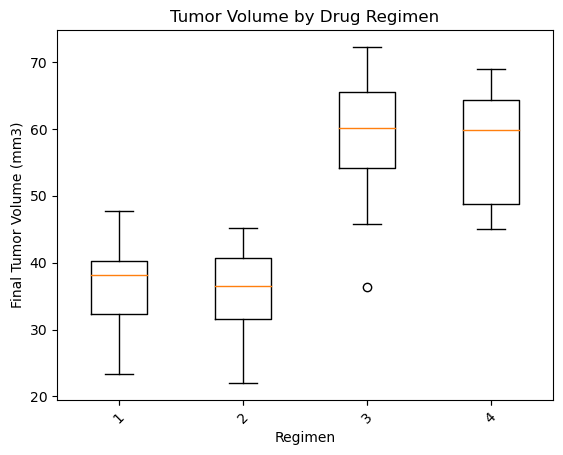

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

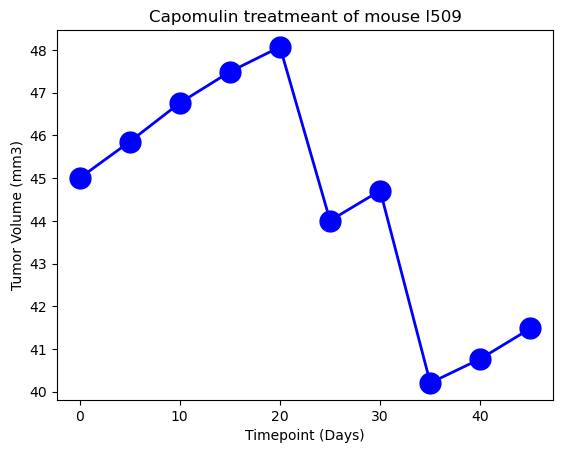

In [111]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

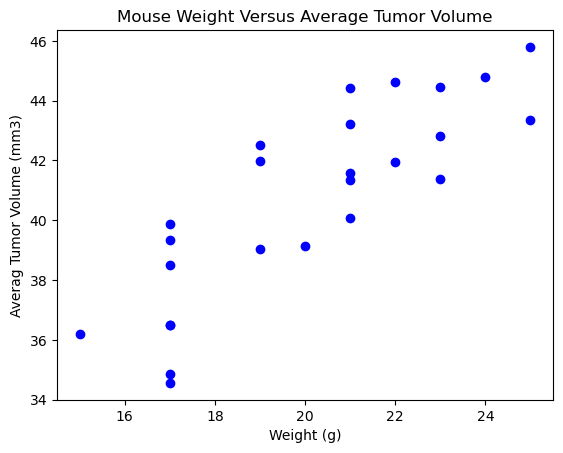

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
Capomulin_volume_average =Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_volume_average['Weight (g)'],Capomulin_volume_average['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(Capomulin_volume_average['Weight (g)'],Capomulin_volume_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


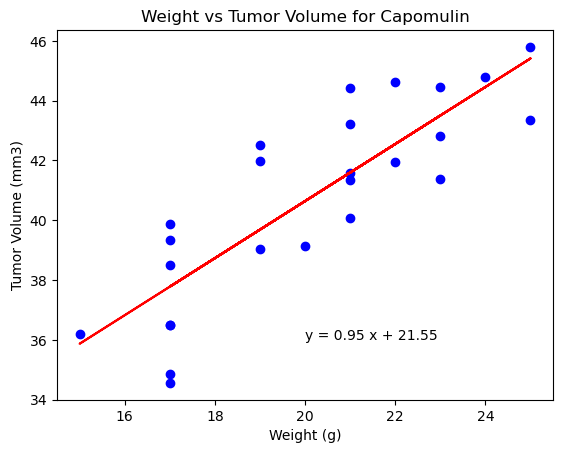

In [114]:
# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(Capomulin_volume_average["Weight (g)"],Capomulin_volume_average["Tumor Volume (mm3)"])
regress_values=Capomulin_volume_average["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Capomulin_volume_average["Weight (g)"],Capomulin_volume_average["Tumor Volume (mm3)"],color='b')
plt.plot(Capomulin_volume_average["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()